



beginning run number 1
episode:  0 score: 51.0 , average score 51.0
episode:  1 score: 23.0 , average score 37.0
episode:  2 score: 21.0 , average score 31.7
episode:  3 score: 52.0 , average score 36.8
episode:  4 score: 34.0 , average score 36.2
data saved in file reinforce_v1_lr0010_g9900_runs2_eps10.csv
pssw
SVD did not converge in Linear Least Squares for run 1


C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


episode:  5 score: 30.0 , average score 35.2
episode:  6 score: 42.0 , average score 36.1
episode:  7 score: 10.0 , average score 32.9
episode:  8 score: 14.0 , average score 30.8
episode:  9 score: 43.0 , average score 32.0
data saved in file reinforce_v1_lr0010_g9900_runs2_eps10.csv
pssw




beginning run number 2


C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


episode:  0 score: 45.0 , average score 45.0
episode:  1 score: 21.0 , average score 33.0
episode:  2 score: 25.0 , average score 30.3
episode:  3 score: 10.0 , average score 25.2
episode:  4 score: 60.0 , average score 32.2
data saved in file reinforce_v1_lr0010_g9900_runs2_eps10.csv
pssw
SVD did not converge in Linear Least Squares for run 2


C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


episode:  5 score: 65.0 , average score 37.7
episode:  6 score: 94.0 , average score 45.7
episode:  7 score: 21.0 , average score 42.6
episode:  8 score: 37.0 , average score 42.0
episode:  9 score: 20.0 , average score 39.8
data saved in file reinforce_v1_lr0010_g9900_runs2_eps10.csv
pssw
pssw
working on average plot


C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ambar\Documents\GitHub\RLA3\dotpy_code\utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


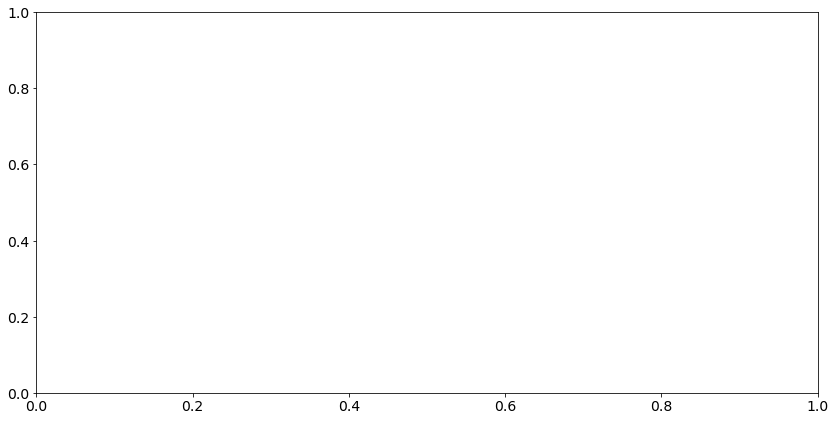

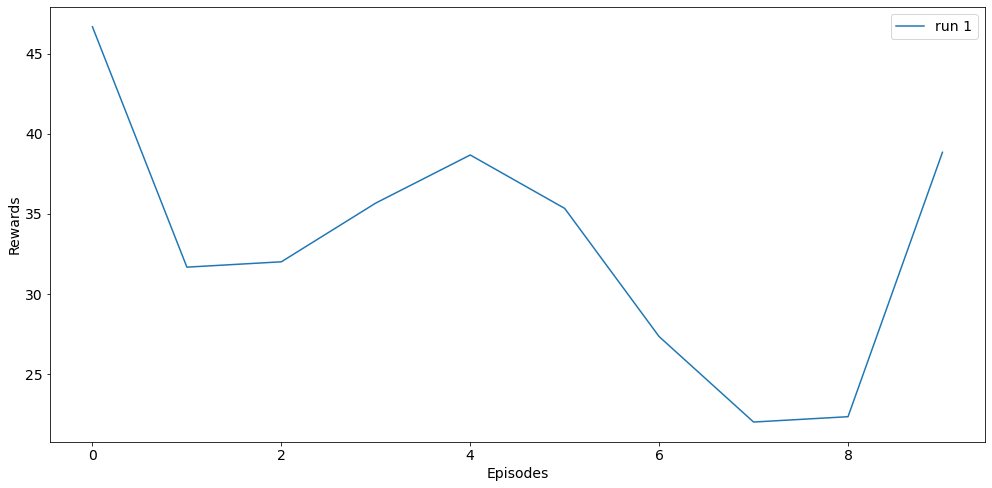

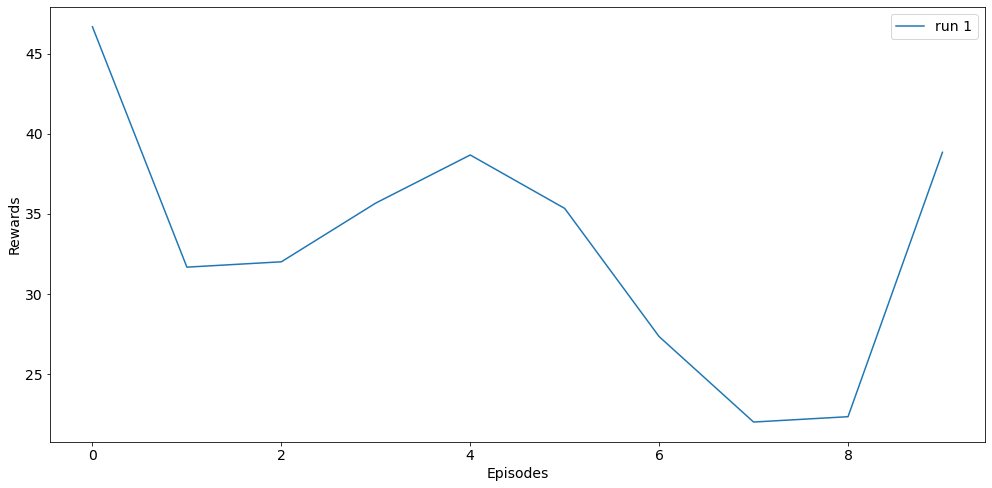

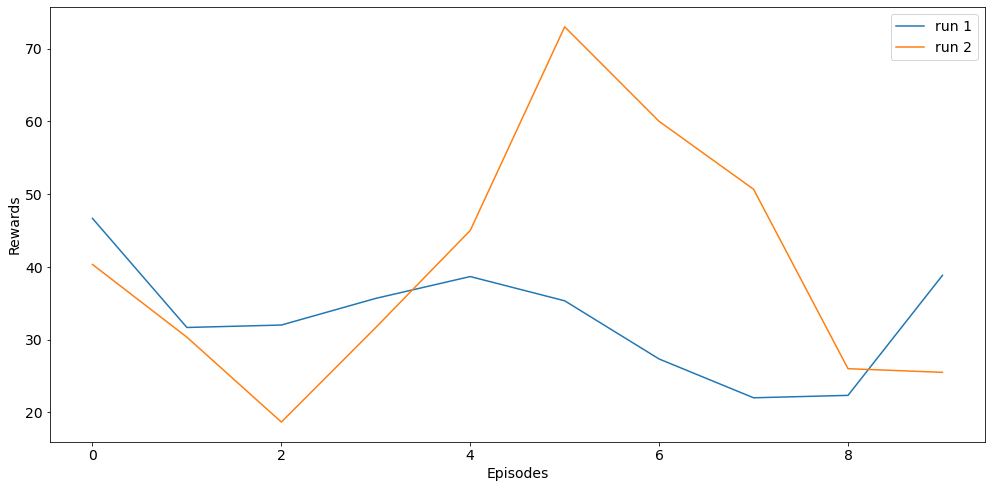

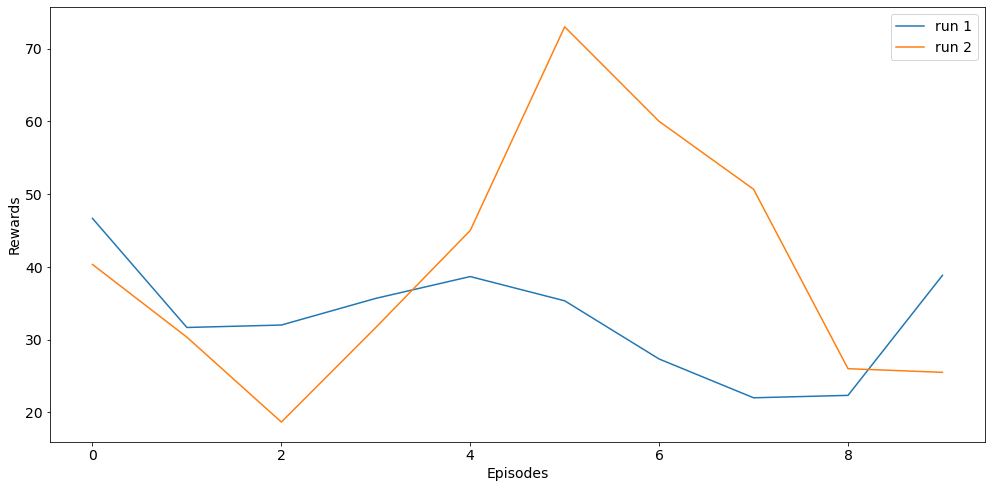

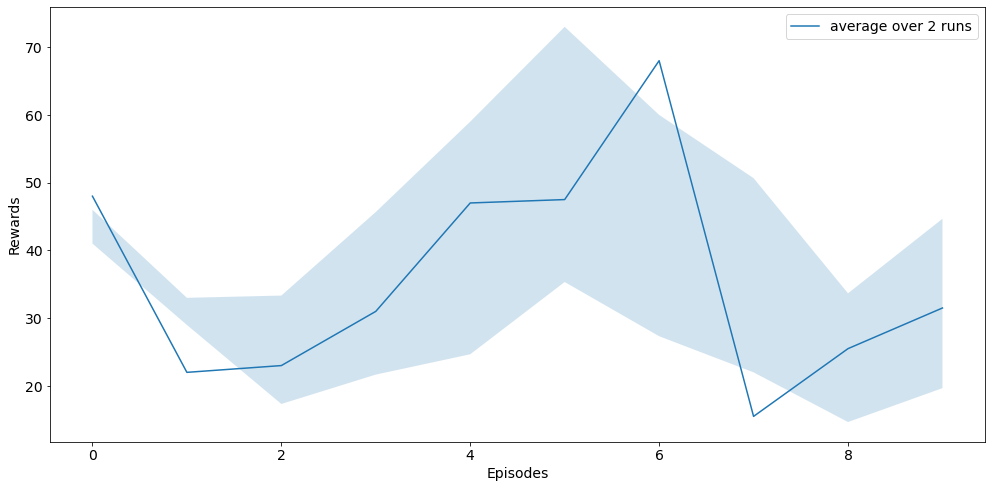

In [1]:
#!/usr/bin/env python3
"""
Assignment Submission for course 'Reinforcement Learning',
Leiden University, The Netherlands
2022
By Ambar Qadeer
"""

import gym
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_smoothed_scores_wip, save_data
from agent import reinforce_agent

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams.update({'font.size': 14})


# set hyperparameters here

# learnrate = 0.001
# gam = 0.99
# runs = 8
# ep_num = 2000
# save_data_cadence = 500
# smoothen_over = 11
# if save_data_cadence>ep_num:
#     print("WARNING : data will not get saved if save cadence is more than ep_num")
#
# # bookkeeping
# fname = "reinforce_v1_lr"+"{:.4f}".format(learnrate)[-4:]+"_g"+"{:.4f}".format(gam)[-4:]+"_runs{:1d}_eps".format(runs)+str(ep_num)


# testing
learnrate = 0.001
gam = 0.99
runs = 2
ep_num = 10
save_data_cadence = 5
smoothen_over = 3
if save_data_cadence>ep_num:
    print("WARNING : data will not get saved if save cadence is more than ep_num")
# bookkeeping
fname = "reinforce_v1_lr"+"{:.4f}".format(learnrate)[-4:]+"_g"+"{:.4f}".format(gam)[-4:]+"_runs{:1d}_eps".format(runs)+str(ep_num)

if __name__ == "__main__":

    score_stack = []
    # run loop
    for run_num in range(runs):

        print("\n\n\n\nbeginning run number {}".format(run_num+1))

        # initialise environment
        env = gym.make('CartPole-v1')

        # initialize agent
        agent_007 = reinforce_agent(lr=learnrate, gamma=gam, n_actions=env.action_space.n, n_states=env.observation_space.shape)

        # list to maintain score
        score_hist = []
        score_stack.append(score_hist)

        # episode loop
        for ep in range(ep_num):
            done = False
            score = 0
            s = env.reset()

            # step loop
            while not done:
                a = agent_007.get_act(s)
                s_next, reward, done, _ = env.step(a)
                agent_007.remember(s, a, reward)
                s = s_next
                score += reward
            #                 env.render()

            # append score to score list
            score_hist.append(score)

            # make agent learn
            agent_007.learn()
            avg_score = np.mean(score_hist[-100:])
            print('episode: ', ep, 'score: %.1f' % score,
                  ', average score %.1f' % avg_score)

            if (ep + 1) % save_data_cadence == 0:
                score_stack[-1] = score_hist
                save_data(score_stack, ep_num, ep, fname, sav_win = smoothen_over)

# plot results
plot_smoothed_scores_wip(score_stack, sav_window = smoothen_over, avg_plot = 1, save = 1, fname = fname)